<a href="https://colab.research.google.com/github/GawainGan/Causal-Inference/blob/main/Causal%20Inference%20and%20Discovery%20in%20Python/Chap_4_Graphical_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz
import networkx as nx
import pydot

# 1. Graph in praphviz

In [2]:
nodes = ['A', 'B', 'C', 'D']

In [3]:
# Define graphs
graphs = {

    'DAG': {
        'graph': graphviz.Digraph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    },

    'DCG': {
        'graph': graphviz.Digraph(format='png'),
        'edges': ['AB', 'AD', 'BB', 'BC', 'DC', 'CA']
    },

    'Undirected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'BC', 'AD', 'DC']
    },

    'Fully connected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'AC', 'AD', 'BC', 'BD', 'CD']
    },

    'Partially connected': {
        'graph': graphviz.Graph(format='png'),
        'edges': ['AB', 'AC', 'BC']
    }
}


# Iterate over graphs and render
for name, graph in graphs.items():

    [graph['graph'].node(n) for n in nodes]
    graph['graph'].edges(graph['edges'])

    graph['graph'].render(f'img/ch_04_graph_{name}')

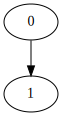

In [4]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1']

edges = ['01']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'directed_graph_1')

graph

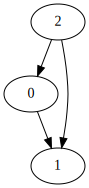

In [5]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1', '2']

edges = ['01', '21', '20']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'directed_graph_2')

graph

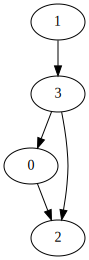

In [6]:
graph = graphviz.Digraph(format='png')

nodes = ['0', '1', '2', '3']

edges = ['02', '13', '32', '30']

[graph.node(n) for n in nodes]
graph.edges(edges)

graph.render(f'directed_graph_3')

graph

# 2. Graph in networkx

In [7]:
import networkx as nx

In [8]:
# Define the graph
sample_gml = """graph [
directed 1

node [
    id 0
    label "0"
    ]

node [
    id 1
    label "1"
    ]

node [
    id 2
    label "2"
    ]


edge [
    source 0
    target 1
    ]

edge [
    source 2
    target 1
    ]
]

    """

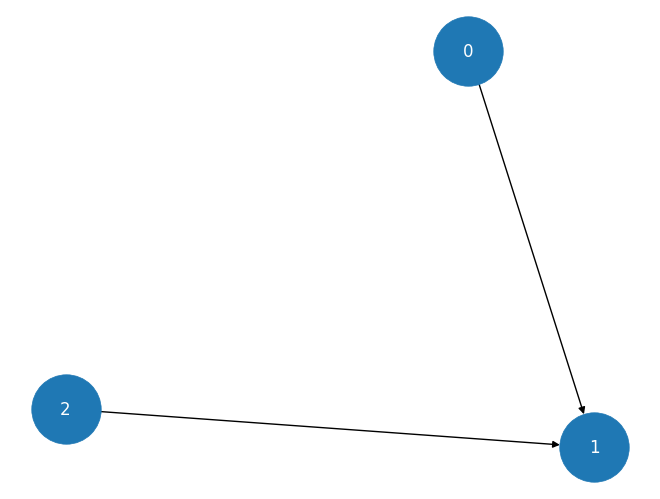

In [9]:
# Get the graph
graph = nx.parse_gml(sample_gml)

# Plot
nx.draw(
    G=graph,
    with_labels=True,
    node_size=2500,
    font_color='white'
)

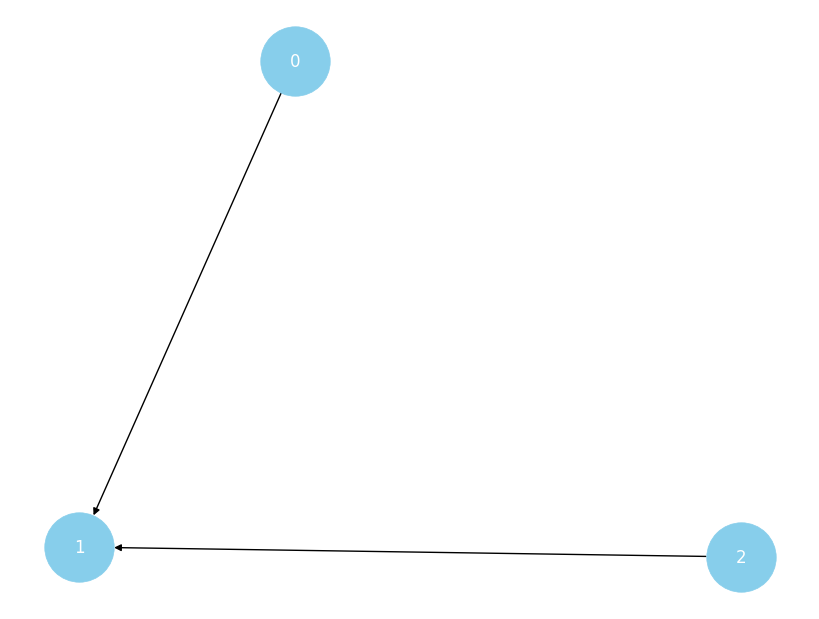

In [10]:
# Define the adjacency matrix
adj_matrix = np.array([
    [0, 1, 0],
    [0, 0, 0],
    [0, 1, 0]
])

# Convert adjacency matrix to a NetworkX graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Plot
plt.figure(figsize=(8, 6))
nx.draw(
    G=graph,
    with_labels=True,
    node_size=2500,
    node_color='skyblue',
    font_color='white',
    arrows=True
)
plt.show()

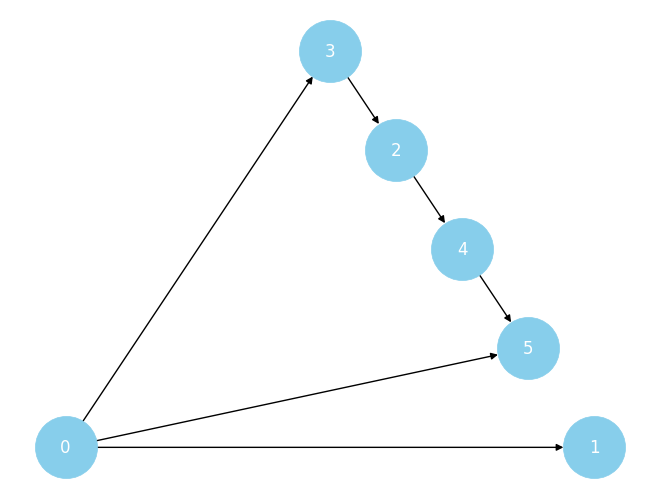

In [11]:
# Define the matrix
adj_matrix = np.array([
    [0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
])

# Get the graph
graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Plot
nx.draw(
    G=graph,
    with_labels=True,
    node_size=2000,
    node_color='skyblue',
    font_color='white',
    pos=nx.planar_layout(graph)
)

# FCI Method

In [12]:
pip install causal-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 1.3 MB/s eta 0:00:00


## Using FCI

In [13]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.graph.GraphNode import GraphNode

In [53]:
# 设置随机种子
np.random.seed(42)

# 模拟数据
N = 1000  # 样本数
demand = np.random.normal(size=N)
price = 0.5 * demand + np.random.normal(size=N)
supply = 0.3 * price + np.random.normal(size=N)
demand += 0.2 * supply + np.random.normal(size=N)

# 创建数据框
data = pd.DataFrame({'Demand': demand, 'Price': price, 'Supply': supply})

# 转换为numpy数组
data_np = data.to_numpy()

# 使用FCI算法
nodes = [GraphNode("Demand"), GraphNode("Price"), GraphNode("Supply")]
fci_output = fci(data_np, alpha=0.05, nodes=nodes)

graph = fci_output[0]

# 打印结果
print("Adjacency Matrix:")
print(graph)



  0%|          | 0/3 [00:00<?, ?it/s]

Adjacency Matrix:
Graph Nodes:
X1;X2;X3

Graph Edges:
1. X1 o-o X2
2. X1 o-o X3
3. X2 o-o X3



In [15]:
# visualization
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

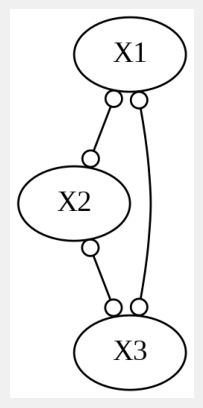

In [17]:
pyd = GraphUtils.to_pydot(graph)
tmp_png = pyd.create_png('png')
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

## PC

  0%|          | 0/3 [00:00<?, ?it/s]

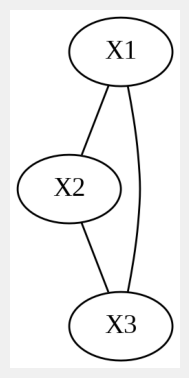

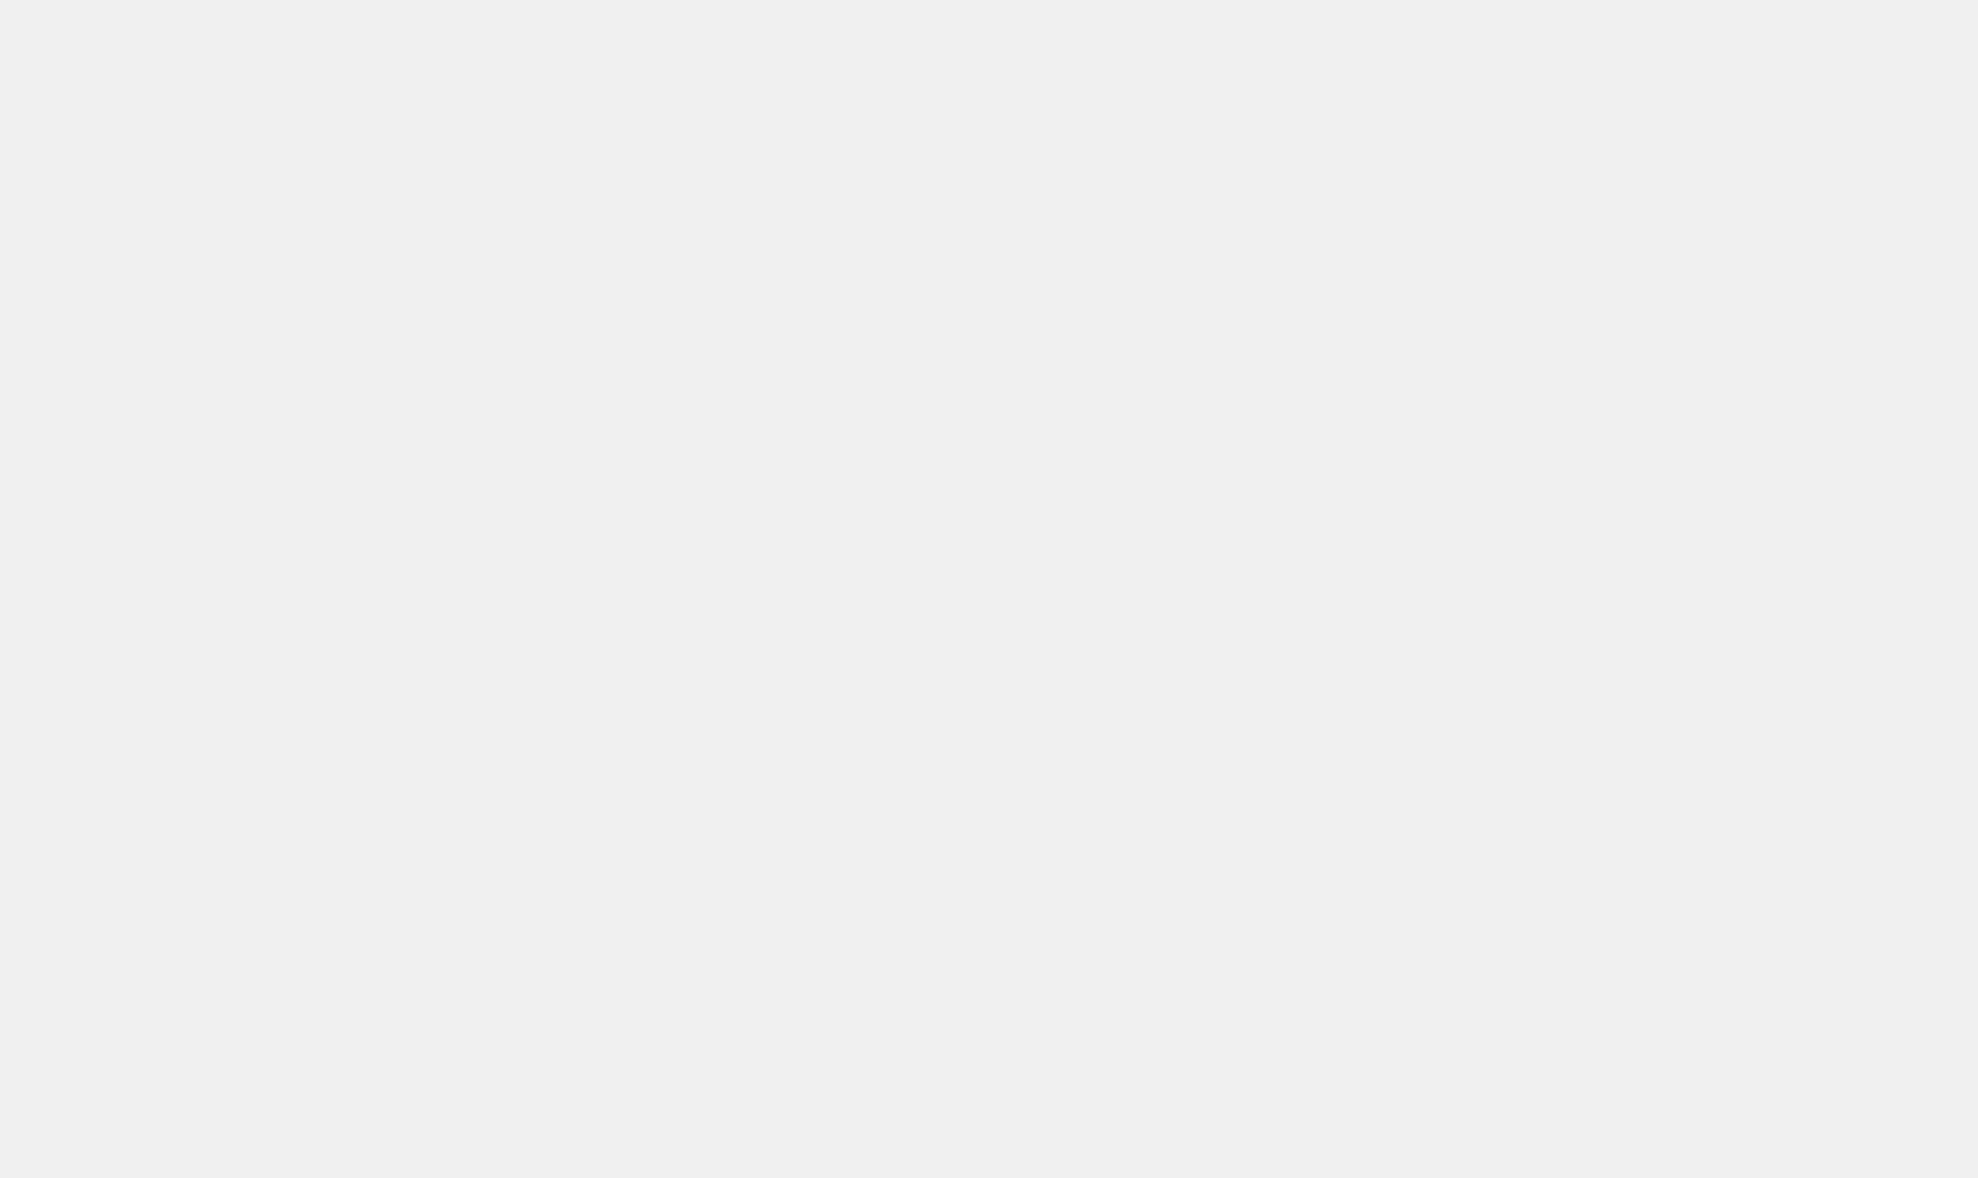

In [20]:
from causallearn.search.ConstraintBased.PC import pc

# 使用PC算法
pc_output = pc(data_np, alpha=0.05, nodes=nodes)

plt.figure(figsize=(6, 4))
pc_output.draw_pydot_graph()
plt.axis('off')
plt.show()

# Example on DoWhy

Reference: https://www.pywhy.org/dowhy/v0.9.1/example_notebooks/dowhy_simple_example.html

In [25]:
pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 2.2 MB/s eta 0:00:00


In [27]:
import numpy as np
import pandas as pd
from dowhy import CausalModel
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

# 模拟数据
N = 1000  # 样本数
demand = np.random.normal(size=N)
price = 0.5 * demand + np.random.normal(size=N)
supply = 0.3 * price + np.random.normal(size=N)
demand += 0.2 * supply + np.random.normal(size=N)

# 创建数据框
data = pd.DataFrame({'Demand': demand, 'Price': price, 'Supply': supply})

# 对连续变量进行离散化处理
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_discretized = pd.DataFrame(discretizer.fit_transform(data), columns=data.columns)


In [28]:
# 使用dowhy进行因果推断
# 定义因果模型
model = CausalModel(
    data=data_discretized,
    treatment='Demand',
    outcome='Supply',
    common_causes=['Price']
)

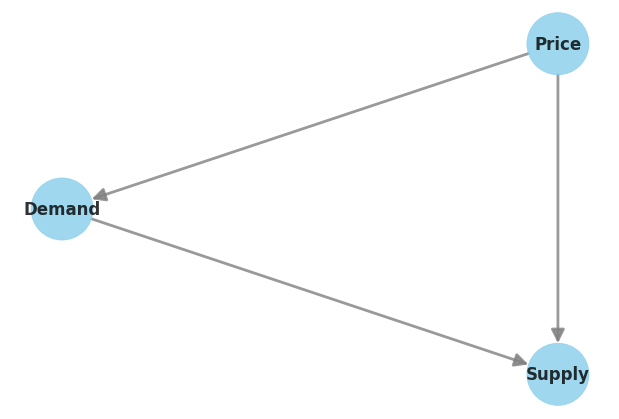

In [36]:
# 绘制因果图，并调整绘图窗口大小
model.view_model(layout="dot", size=(6,4))
plt.show();

In [62]:
# 识别因果效应
identified_estimand = model.identify_effect()

# 显示因果效应的估计值
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                     
─────────(E[Supply|Price])
d[Demand]                 
Estimand assumption 1, Unconfoundedness: If U→{Demand} and U→Supply then P(Supply|Demand,Price,U) = P(Supply|Demand,Price)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



- `Estimand type: EstimandType.NONPARAMETRIC_ATE`: 表示估计量的类型是非参数化的平均处理效应（Average Treatment Effect, ATE）。非参数化意味着没有假设特定的函数形式来描述变量之间的关系。

- `### Estimand : 1
Estimand name: backdoor
Estimand expression:
......               
If U→{Demand} and U→Supply then P(Supply|Demand,Price,U) = P(Supply|Demand,Price)` : 这个部分表示通过后门准则（backdoor criterion）识别的因果效应。具体来说，这个估计量表达式表示计算处理变量（Demand）对结果变量（Supply）的平均因果效应，同时控制了共同原因（Price）


- `### Estimand : 2`: 这个部分表示尝试识别工具变量（Instrumental Variables, IV）来估计因果效应。IV 是一种在某些情况下用于估计因果效应的方法，但是在这个模型中，没有找到合适的工具变量。

- `### Estimand : 3`: 这个部分表示尝试通过前门准则（frontdoor criterion）来识别因果效应。前门准则是一种在特定情况下用于估计因果效应的方法，但是在这个模型中，没有找到合适的变量来应用前门准则。

- **后门准则假设**: 假设1（Unconfoundedness）：如果存在未观测的混淆变量 U 影响了 Demand 和 Supply，则在给定 Demand、Price 和 U 的情况下，Supply 的条件分布不再依赖于 U。这意味着，给定 Demand 和 Price，我们可以忽略 U 的影响。
- **工具变量（IV） 和 前门准则（frontdoor criterion）**在这个具体的例子中没有找到合适的变量，因此无法使用这些方法来估计因果效应。

In [64]:
# 估计因果效应
# estimate = model.estimate_effect(identified_estimand,
#                                  method_name="backdoor.propensity_score_matching") # 倾向评分方法（propensity_score_matching）只适用于二值处理变量（binary treatments），而我们的 Demand 变量是连续的

# 估计因果效应，使用线性回归
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

# 显示因果效应的估计值
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                     
─────────(E[Supply|Price])
d[Demand]                 
Estimand assumption 1, Unconfoundedness: If U→{Demand} and U→Supply then P(Supply|Demand,Price,U) = P(Supply|Demand,Price)

## Realized estimand
b: Supply~Demand+Price
Target units: ate

## Estimate
Mean value: 0.13995533544809025



后门准则的应用步骤

	1.	识别共同原因：在因果图中，找到所有影响处理变量和结果变量的共同原因。
	2.	控制共同原因：通过控制这些共同原因，使得处理变量和结果变量之间的路径中断，从而消除共同原因的影响。
	3.	估计因果效应：在控制了共同原因后，估计处理变量对结果变量的因果效应。

在我们的示例中，我们要估计 Demand（需求）对 Supply（供应）的因果效应。Price（价格）被识别为共同原因，因为它同时影响 Demand 和 Supply。

具体步骤

1.	构建因果图：
	- Price 影响 Demand 和 Supply。
	- Demand 直接影响 Supply。
  - 因果图如下所示：
  ```
  Price → Demand → Supply
              ↘       ↗
                Supply
  ```
2. **识别共同原因**：
   - `Price` 是影响 `Demand` 和 `Supply` 的共同原因。

3. **控制共同原因**：
   - 在估计 `Demand` 对 `Supply` 的因果效应时，我们需要控制 `Price`，以消除其对因果效应的混淆影响。

4. **因果效应估计表达式**：
   - 后门准则给出的表达式为：

  $\frac{d}{d[Demand]}(E[Supply | Price])$

   这意味着我们需要估计在控制 `Price` 的情况下，`Demand` 对 `Supply` 的期望值的变化。


而返回的结果告诉我们：在模型中，我门需要假设在控制 Price 的情况下，如果有潜在的混淆变量 U 同时影响 Demand 和 Supply，那么在给定 Demand 和 Price 的条件下，Supply 的分布不再依赖于 U。**这是一个关键假设，称为“不混淆假设”（Unconfoundedness）**

In [67]:
# 进行假设检验
refute_results = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute_results)

Refute: Use a Placebo Treatment
Estimated effect:0.13995533544809025
New effect:0.0
p value:1.0



**原假设**：
原假设是指虚假的处理变量对 Supply 没有影响。p 值为 1.0 表示我们没有足够的证据拒绝原假设，这支持了我们的因果效应估计的稳健性。

**假设检验和安慰剂处理**：
- 使用安慰剂处理变量进行假设检验，以验证因果效应估计的稳健性。结果显示新效应为 0.0，p 值为 1.0。
- 虚假的处理变量并不是指混淆变量  U ，而是一个与实际处理无关的变量，用于测试因果效应估计的稳健性。
- 高 p 值（1.0）表示没有观察到显著的因果效应，支持了原假设，即虚假的处理变量对结果变量没有影响。

**因果效应估计**：
- 我们估计 Demand 对 Supply 的因果效应，同时控制 Price。
- 估计的因果效应为 0.14，表示 Demand 变化一个单位时，Supply 预期变化约 0.14 个单位。